In [19]:
from PIL import Image, ImageDraw #Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt

## Пороговая обработка

In [20]:
image = Image.open('fox.jpg')  # Открываем изображение
draw = ImageDraw.Draw(image)  # Создаем инструмент для рисования
width = image.size[0]  # Определяем ширину
height = image.size[1]  # Определяем высоту
pix = image.load()

In [21]:
for x in range(width):     # ручной цикл получения значений яркости из RGB изображения
    for y in range(height):
        r, g, b = pix[x, y]
        sr = (r+g+b)//3 # не точно, коэффициенты потерялись
        draw.point((x, y), (sr, sr, sr))  # заполнение массива средними значениями пикселей
        
image.save("result.jpg", "JPEG") #сохранение полученного изображения

In [22]:
with Image.open("fox.jpg") as im:  #использование менеджера контекста, конвертация в массив яркостей
    im = im.convert("L")

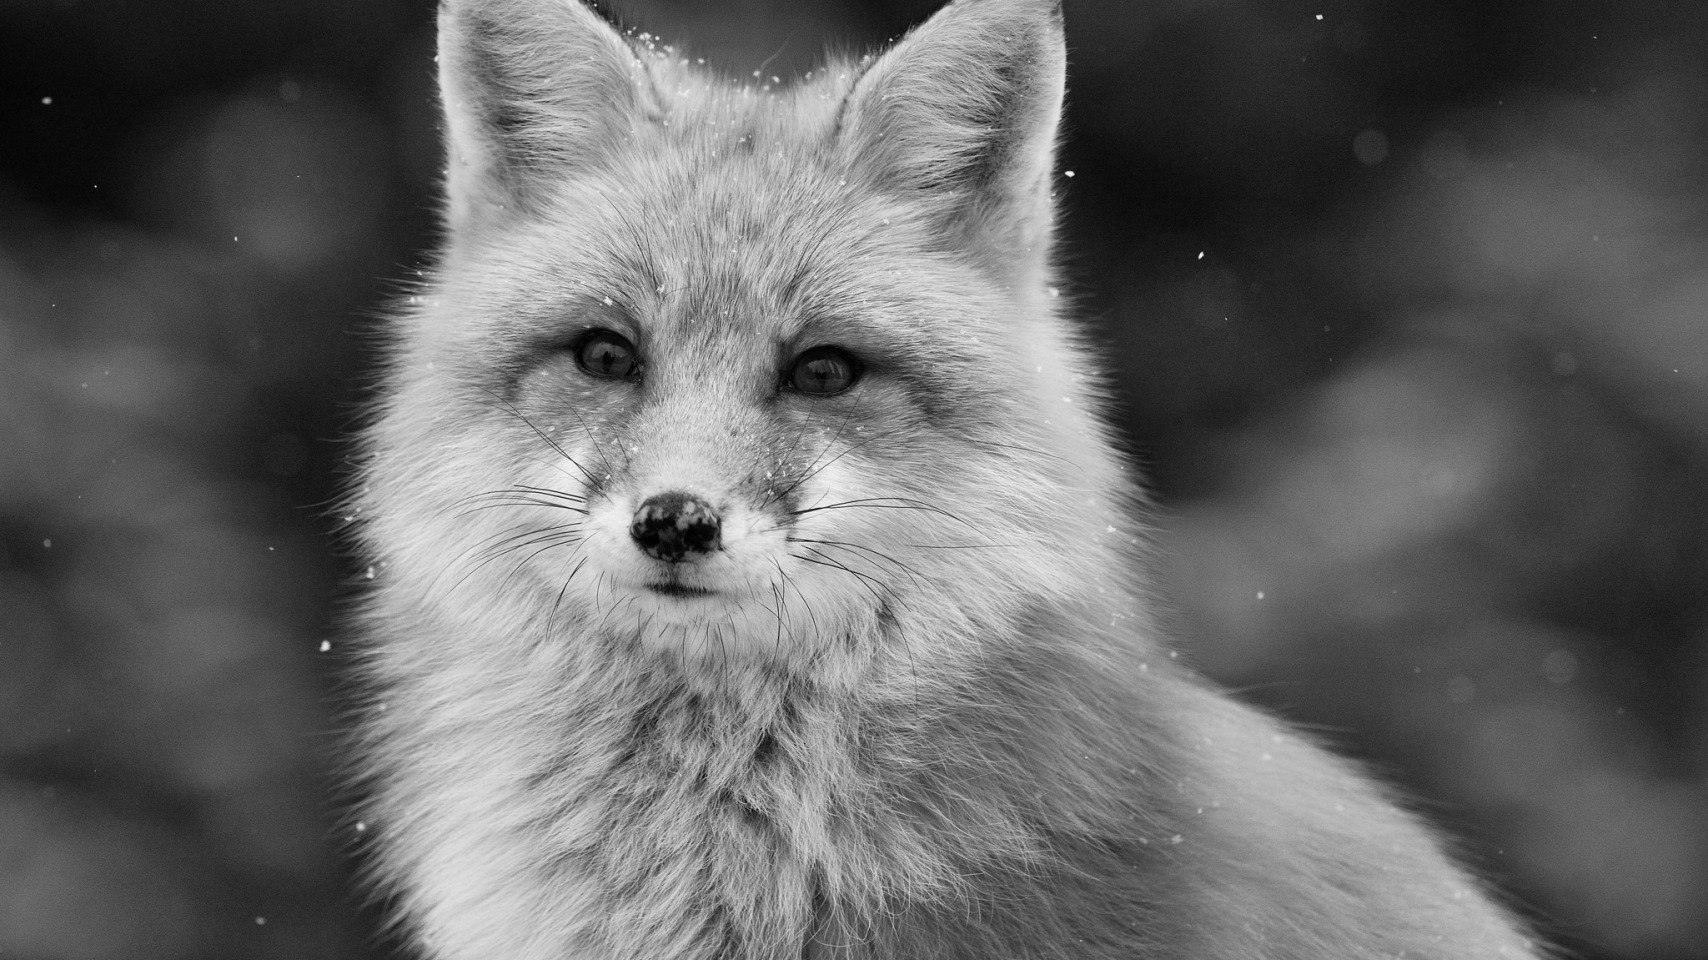

In [23]:
im

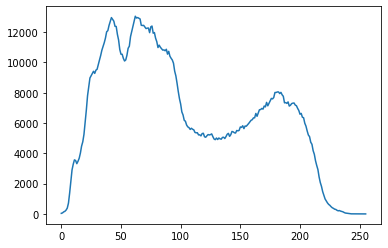

In [24]:
histogram = im.histogram()
bins= range(len(histogram))
plt.plot(bins, histogram)


In [25]:
def porog(image, threshold):
    width = image.size[0]  # Определяем ширину
    height = image.size[1]  # Определяем высоту
    pix = image.load()
    for i in range(width):
        for j in range(height):
            if pix[i,j] > threshold:
                pix[i, j] = 0
            else:
                pix[i, j] = 255
                
    return image

In [26]:
porog_c=porog(im, 130)
porog_c.save("fox 2.png")

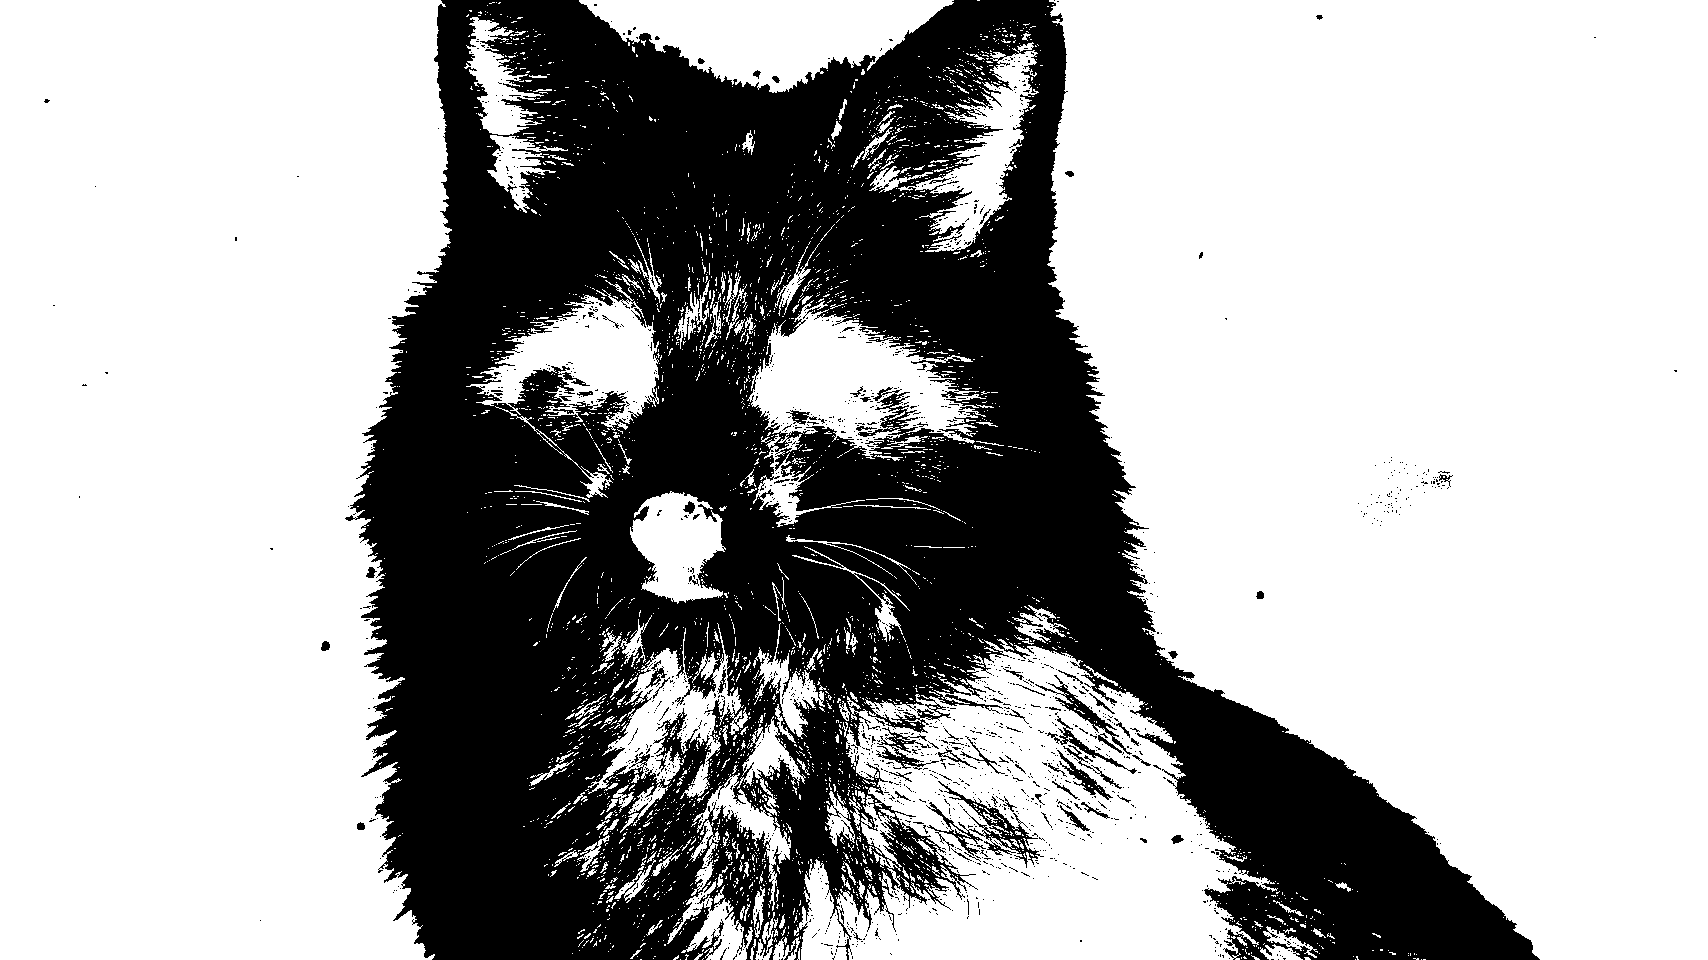

In [27]:
porog_im = Image.open("fox 2.png")
porog_im

## Линейное контрастирование

179 255


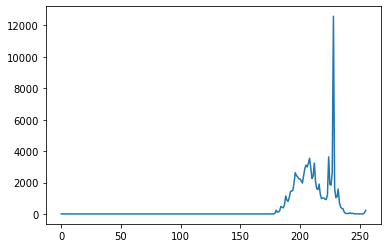

In [28]:
im = Image.open("house.jpg")
im = im.convert("L")
width, height = (im.size[0], im.size[1])
pix = im.load()
data  = np.asarray(im)
fmax = np.max(data)
fmin = np.min(data)
print(fmin, fmax)
histogram = im.histogram()
bins= range(len(histogram))
plt.plot(bins, histogram)

In [29]:
gmax = 255
gmin = 0
a = (gmax-gmin)/(fmax-fmin)
b = (gmin*fmax - gmax*fmin)/(fmax - fmin)
for i in range(width):
    for j in range(height):
        if pix[i,j] > gmax:
            pix[i, j] = 255
        elif pix[i,j] < gmin:
            pix[i, j] = 0
        else:
            pix[i, j] = int(a*pix[i, j] + b)
            
im.save("house1.jpg")

0 255


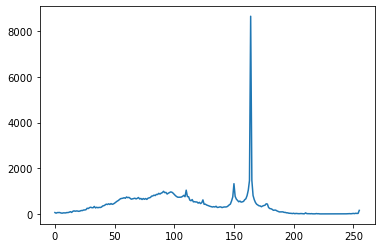

In [30]:
im = Image.open("house1.jpg")
im = im.convert("L")
width, height = (im.size[0], im.size[1])
pix = im.load()
data  = np.asarray(im)
fmax = np.max(data)
fmin = np.min(data)
print(fmin, fmax)
histogram = im.histogram()
bins= range(len(histogram))
plt.plot(bins, histogram)

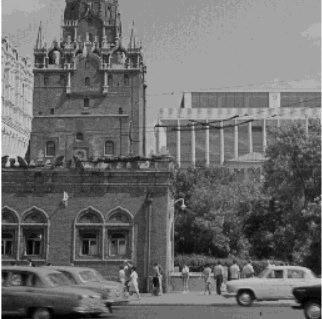

In [31]:
im

## Препарирование

In [32]:
with Image.open("fox.jpg") as im:  #использование менеджера контекста, конвертация в массив яркостей
    im = im.convert("L")
    im.save("grey_fox.png")
    

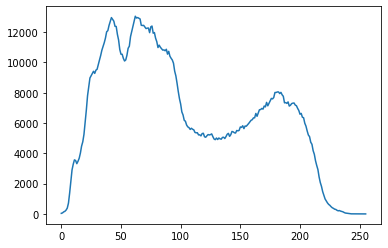

In [33]:
histogram = im.histogram()
bins= range(len(histogram))
plt.plot(bins, histogram)

In [34]:
min_v = 50
max_v = 180
pix = im.load()
width, height = (im.size[0], im.size[1])
for i in range(width):
    for j in range(height):
        if pix[i,j] < min_v:
            pix[i, j] = 0
        elif pix[i,j] > max_v:
            pix[i, j] = 255
        else:
            pix[i, j] = int((pix[i, j]-min_v)/(max_v - min_v)*255)

In [35]:
im.save("contrast_fox.png")

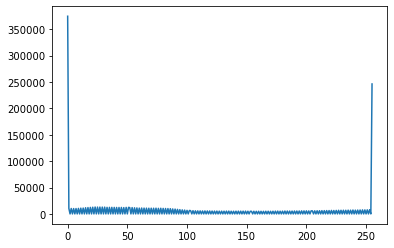

In [36]:
with Image.open("contrast_fox.png") as im:  
    im = im.convert("L")
    histogram = im.histogram()
    bins= range(len(histogram))
    plt.plot(bins, histogram)

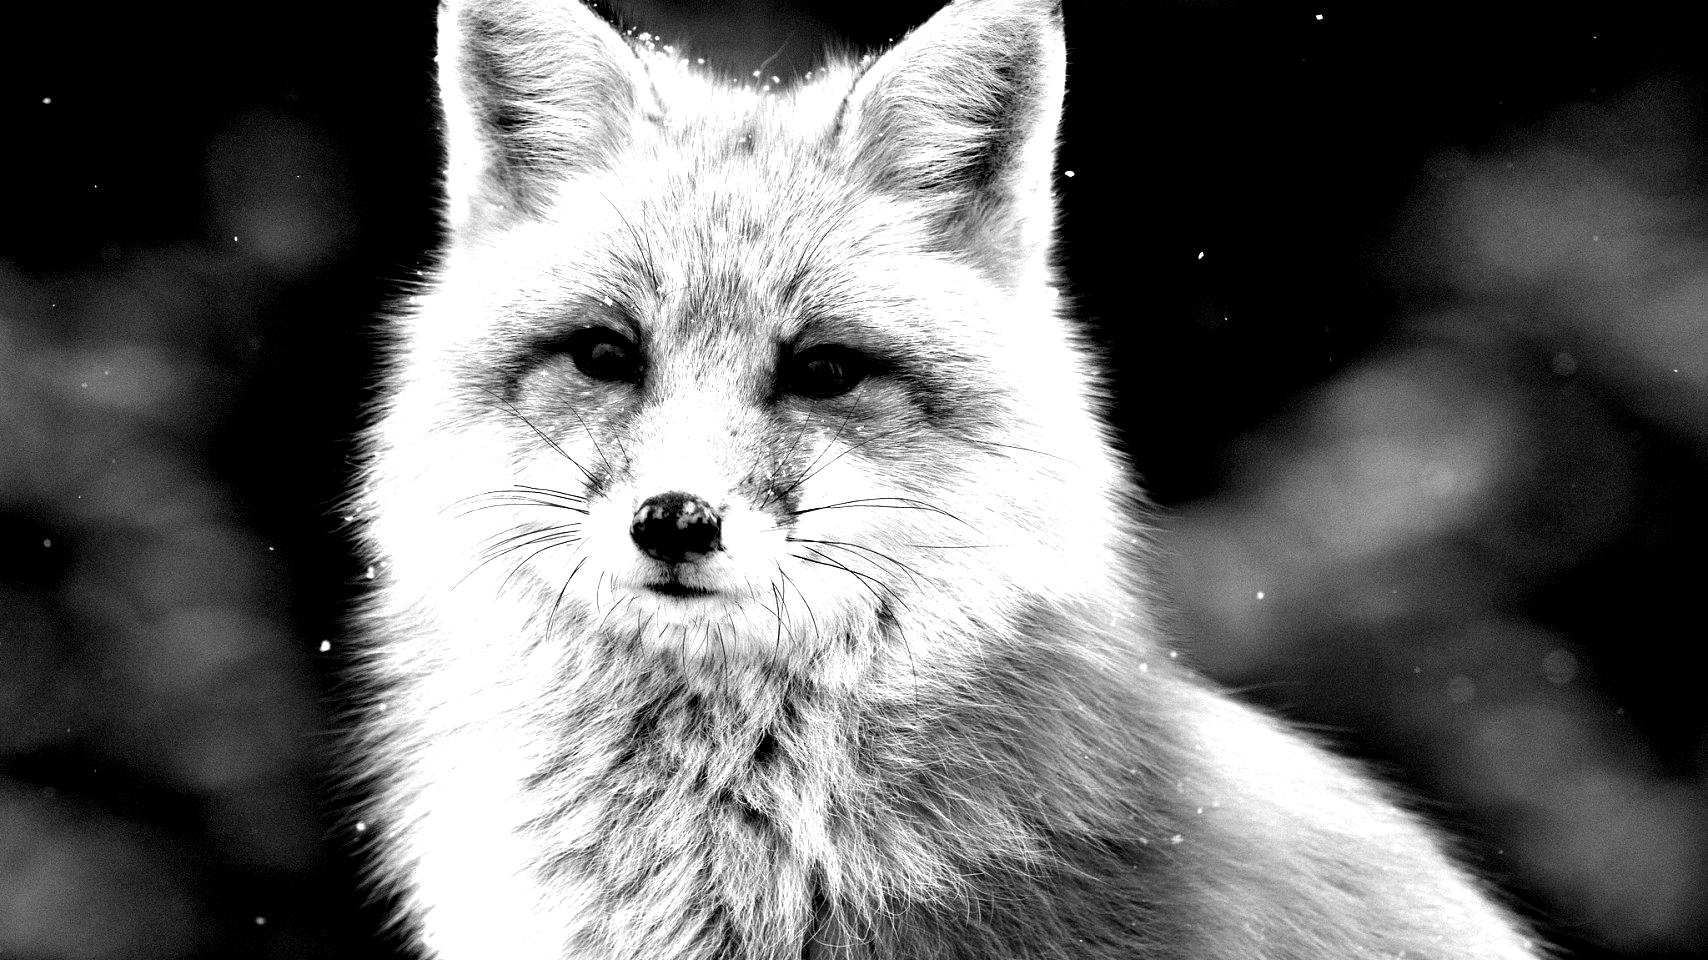

In [37]:
im